In [1]:
import pandas as pd

In [3]:
test = pd.read_excel("./didi4010/test.xlsx")
city = pd.read_excel("./didi4010/city.xlsx")

<table class='center'>
    <thead>
        <tr>
            <th>字段名称</th>
            <th>字段解释</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>date</td>
            <td>日期</td>
        </tr>
        <tr>
            <td>group</td>
            <td>组别</td>
        </tr>
        <tr>
            <td>requests</td>
            <td>订单请求数</td>
        </tr>
        <tr>
            <td>gmv</td>
            <td>成交总额</td>
        </tr>
        <tr>
            <td>coupon per trip</td>
            <td>每单优惠金额</td>
        </tr>
        <tr>
            <td>trips</td>
            <td>订单数</td>
        </tr>
        <tr>
            <td>canceled requests</td>
            <td>取消订单数</td>
        </tr>
    </tbody>
</table>

<table class='center'>
    <thead>
        <tr>
            <th>字段名称</th>
            <th>字段解释</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>date</td>
            <td>日期</td>
        </tr>
        <tr>
            <td>hour</td>
            <td>时点</td>
        </tr>
        <tr>
            <td>requests</td>
            <td>订单请求数</td>
        </tr>
        <tr>
            <td>supply hours</td>
            <td>可服务时长</td>
        </tr>
        <tr>
            <td>average minutes of trips</td>
            <td>平均订单时长（分钟）</td>
        </tr>
        <tr>
            <td>pETA</td>
            <td>顾客预计等待时长</td>
        </tr>
        <tr>
            <td>aETA</td>
            <td>顾客实际等待时长</td>
        </tr>
        <tr>
            <td>utiliz</td>
            <td>司机在忙率</td>
        </tr>
    </tbody>
</table>

In [11]:
city.shape

(90, 9)

## 滴滴A/B测试

In [12]:
# 计算优惠卷投入相GMV的ROI
test['ROI'] = test['gmv'] / (test['coupon per trip'] * test['trips'])
test.head()

,date,group,requests,gmv,coupon per trip,trips,canceled requests,ROI
0,2019-01-01,control,30,7486.620,1.069746,24,1,291.604269
1,2019-01-02,control,152,38301.575,1.044199,121,8,303.143166
2,2019-01-03,control,267,67768.425,1.032276,215,14,305.346684
3,2019-01-04,control,369,94992.900,1.028196,298,19,310.026761
4,2019-01-05,control,478,123236.875,1.011807,390,24,312.304607


### requests的方差检验

在这里，test的样本量为59，均分为对照组和实验组，每组的样本量小于30。

在这里先使用`Levene's test`、`Bartlett's test`或者`F test`来测试两组的方差是否相等，如果测试的结果显著，则应该选择使用更具普适性的不需要假定同协方差性（homoscedasticity）的检验（有些情况下甚至可以使用non-parametric test）。例如Welch's t-test（unequal variances t-test）可以在这种状况下使用。

1. 两组方差分别为v1，v2
2. 零假设H0：v1 = v2，备选假设H1：v1 ≠ v2
3. 显著水平取0.05

In [13]:
import scipy.stats as st

requests_a = test[test.group=='control'].requests
requests_b = test[test.group=='experiment'].requests

st.levene(requests_a, requests_b)

LeveneResult(statistic=0.014685075667736849, pvalue=0.903980667108546)

p值大于选取的显著水平0.05，没有足够的证据拒绝零假设，所以可以认为两组实验的requests齐方差。

### requests的均值检验

1. 该数据为同一样本实验前后的不同水平，因此选用配对样本t检验
2. 两组均值分别为u1，u2
3. 零假设H0：u1 = u2，备选假设H1：u1 ≠ u2
4. 显著水平取0.05

In [14]:
st.ttest_rel(requests_a, requests_b)

Ttest_relResult(statistic=1.6436140982479508, pvalue=0.11143970454099936)

p值大于0.05，没有足够的证据拒绝零假设，所以可以认为实验对两组的requests影响不显著。

### gmv方差/均值检验

In [15]:
gmv_a = test[test.group=='control'].gmv
gmv_b = test[test.group=='experiment'].gmv

st.levene(gmv_a, gmv_b)

LeveneResult(statistic=0.02865341299111212, pvalue=0.8661917430097603)

p值大于选取的显著水平0.05，没有足够的证据拒绝零假设，所以可以认为两组实验的gmv齐方差。

In [16]:
st.ttest_rel(gmv_a, gmv_b)

Ttest_relResult(statistic=4.247583846321442, pvalue=0.00021564303983362577)

p值小于0.05，有充足的证据拒绝零假设，所以可以认为实验对两组的gmv影响显著。

### ROI方差/均值检验

In [25]:
roi_a = test[test.group=='control'].ROI
roi_b = test[test.group=='experiment'].ROI

st.levene(roi_a, roi_b)

LeveneResult(statistic=0.10363884745479335, pvalue=0.7487044961896305)

p值大于选取的显著水平0.05，没有足够的证据拒绝零假设，所以可以认为两组实验的ROI齐方差。

In [26]:
st.ttest_rel(roi_a, roi_b)

Ttest_relResult(statistic=10.305504459268173, pvalue=4.93261342734923e-11)

p值小于0.05，有充足的证据拒绝零假设，所以可以认为实验对两组的ROI影响显著。

## 城市运营分析

In [27]:
city.head()

,date,hour,requests,trips,supply hours,average minutes of trips,pETA,aETA,utiliz
0,2013-09-01,11,79,55,42.63,20.43,5.51,7.19,0.479240
1,2013-09-01,12,73,41,36.43,15.53,5.48,8.48,0.426297
2,2013-09-01,13,54,50,23.02,17.76,5.07,8.94,0.771503
3,2013-09-02,11,193,170,64.20,31.47,5.31,6.55,0.490187
4,2013-09-02,12,258,210,80.28,38.68,4.94,6.08,0.481814


In [28]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      90 non-null     datetime64[ns]
 1   hour                      90 non-null     int64         
 2   requests                  90 non-null     int64         
 3   trips                     90 non-null     int64         
 4   supply hours              90 non-null     float64       
 5   average minutes of trips  90 non-null     float64       
 6   pETA                      90 non-null     float64       
 7   aETA                      90 non-null     float64       
 8   utiliz                    90 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 6.5 KB


In [32]:
req_hour = city.groupby(['hour'], as_index=True).agg({'requests': sum})

In [30]:
import matplotlib.pyplot as plt

%matplotlib inline

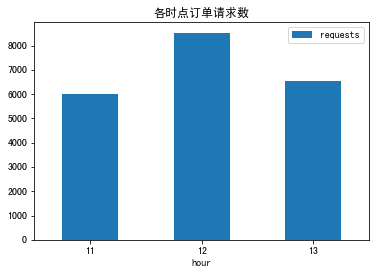

In [35]:
req_hour.plot(kind='bar')
plt.title('各时点订单请求数')
plt.xticks(rotation=0)
plt.show()

In [36]:
req_date = city.groupby(['date'], as_index=True).agg({'requests': sum})
req_date.sort_values('date').head()

,requests
date,
2013-09-01,206
2013-09-02,604
2013-09-03,238
2013-09-04,199
2013-09-05,782


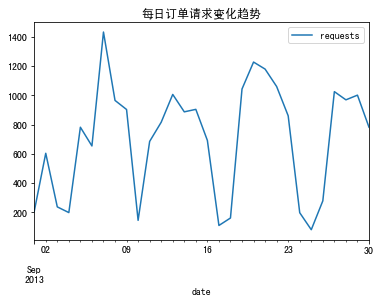

In [38]:
req_date.plot(kind='line')
plt.title('每日订单请求变化趋势')
plt.show()

峰值对应周末，平台可以通过奖励和提高单位收入的方式在周末加大车辆的供给以满足需求。

In [39]:
com_hour = city.groupby('hour', as_index=False).agg({'requests': sum, 'trips': sum})
com_hour['rate'] = com_hour['trips'] / com_hour['requests']
com_hour

,hour,requests,trips,rate
0,11,6008,4550,0.757324
1,12,8530,5850,0.685815
2,13,6559,3085,0.470346


运营部门可以重点关注13点的订单时长，对未被响应的订单进行原因排查，以解决问题提升完成率。

In [40]:
com_date = city.groupby('date').agg({'requests': sum, 'trips': sum})
com_date['rate'] = com_date['trips'] / com_date['requests']
com_date.sort_values('date').head()

,requests,trips,rate
date,,,
2013-09-01,206,146,0.708738
2013-09-02,604,487,0.806291
2013-09-03,238,83,0.348739
2013-09-04,199,102,0.512563
2013-09-05,782,532,0.680307


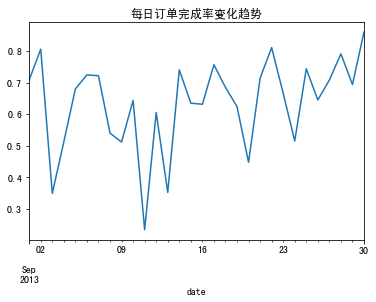

In [41]:
com_date.rate.plot(kind='line')
plt.title('每日订单完成率变化趋势')
plt.show()

In [42]:
import numpy as np

In [51]:
eta_hour = city.groupby('hour').agg({'pETA': 'mean', 'aETA': 'mean'})
eta_hour

,pETA,aETA
hour,,
11,5.397333,6.611000
12,5.860000,7.253333
13,6.018333,7.732667


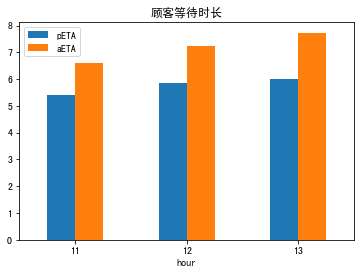

In [52]:
eta_hour.plot(kind='bar')
plt.title('顾客等待时长')
plt.xticks(rotation=0)
plt.show()

In [53]:
diff = eta_hour['aETA'] - eta_hour['pETA']
diff

hour
11    1.213667
12    1.393333
13    1.714333
dtype: float64

用户等待时长的预测需要进一步优化。

In [54]:
city['busy'] = city['supply hours'] * city['utiliz']
city.head()

,date,hour,requests,trips,supply hours,average minutes of trips,pETA,aETA,utiliz,busy
0,2013-09-01,11,79,55,42.63,20.43,5.51,7.19,0.479240,20.43
1,2013-09-01,12,73,41,36.43,15.53,5.48,8.48,0.426297,15.53
2,2013-09-01,13,54,50,23.02,17.76,5.07,8.94,0.771503,17.76
3,2013-09-02,11,193,170,64.20,31.47,5.31,6.55,0.490187,31.47
4,2013-09-02,12,258,210,80.28,38.68,4.94,6.08,0.481814,38.68


In [56]:
busy_hour = city.groupby('hour', as_index=False).agg({'supply hours': sum,
                                                      'busy': sum})
busy_hour['utiliz'] = busy_hour['busy'] / busy_hour['supply hours']
busy_hour

,hour,supply hours,busy,utiliz
0,11,1660.01,768.51,0.462955
1,12,1818.03,1115.28,0.613455
2,13,1274.60,730.83,0.573380


12点时司机在忙时长最长，在忙率也最高，用户的订单请求也最多，说明车辆总数偏少，平台可以着手增加可服务的车辆总数。

In [58]:
trip_min = city.groupby('hour', as_index=False).agg({'average minutes of trips': 'mean'})
trip_min

,hour,average minutes of trips
0,11,25.617
1,12,37.176
2,13,24.361


In [59]:
supply_hour = city.groupby('hour', as_index=False).agg({'supply hours': 'mean'})
supply_hour

,hour,supply hours
0,11,55.333667
1,12,60.601000
2,13,42.486667
